# Plotting grain size distributions of NEEM
***
* Author: Yannick E. Heiser
* Email:  wfg813@alumni.ku.dk
* Last Updated:   4th July 2023
***

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['font.size'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 25
from skimage import io
from tkinter import Tcl
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from scipy.stats import lognorm
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [2]:
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/grain_properties/"
bag_list = ["nmx3642b_1","nmx3642b_2","nmx3642c_1","nmx3642c_2","nmx3643b_1","nmx3643b_2","nmx3644b_1","nmx3644b_2","nmx3645c_1","nmx3646b_1","nmx3646b_2",
            "nmx3647b_1","nmx3647b_2","nmx3649c_1","nmx3649c_2","nmx3650c_1","nmx3650c_2","nmx3651b_1","nmx3651b_2","nmx3652b_1","nmx3652b_2","nmx3653b_1",
            "nmx3653b_2","nmx3655c_1","nmx3655c_2","nmx3656c_1","nmx3656c_2","nmx3657b_1","nmx3657b_2","nmx3658b_1","nmx3658b_2","nmx3659b_1","nmx3659b_2",
            "nmx3661b_1","nmx3662b_1","nmx3662b_2","nmx3663b_1","nmx3663b_2","nmx3664d_1","nmx3664d_2","nmx3665b_1","nmx3667b_1","nmx3667b_2","nmx3668c_1",
            "nmx3668c_2","nmx3669c_1","nmx3669c_2","nmx3670b_1","nmx3670b_2","nmx3671b_1","nmx3671b_2","nmx3673c_1","nmx3673c_2","nmx3674c_1","nmx3674c_2",
            "nmx3676c_1","nmx3676c_2","nmx3677d_1","nmx3677d_2","nmx3680b_1","nmx3680b_2","nmx3681c_1","nmx3681c_2","nmx3682c_1","nmx3682c_2","nmx3684b_1",
            "nmx3684b_2","nmx3685c_1","nmx3685c_2","nmx3686c_1","nmx3686c_2"]
len_img = 12000 #12000 pixel = 6cm
step_size = 200 #200 pixel = 1mm
overlap = 2000 # length of overlap of cropped images 2000px=1cm
px_to_cm = 1/2000 #1px = 1/2000cm
interval_half = 10/10/2/px_to_cm #interval size: change first number to interval size in mm, 1000 pixel = 5mm

def read_csv(path,bags):
    """
    read in csv files with grain size data and put it in dict of dataframes
    --------------------------------------
    param: (str) path: path of csv files
    param: (array) bags: list of bag name strings
    return: (dict) df: dictionary with containing DFs of data
    """
    df = {}
    for i in range(len(bags)):
        bag = str(bags[i])
        print(bag)
        if path != None:
            os.chdir(path + bag)    
        files = glob.glob("*.csv")
        print("# files:",len(files))
        files = Tcl().call('lsort', '-dict', files) #sort csv files after name
        df[bag] = pd.DataFrame()
        for i in range(len(files)):
            file = files[i]
            new_df = pd.read_csv(file)
            new_col = np.ones(new_df.shape[0])*i
            new_col = new_col.astype(int)
            new_df["crop_image"] = new_col
            df[bag] = pd.concat([df[bag],new_df],ignore_index=True)
    os.chdir("/home/jovyan/work/Master Thesis")
    return df

In [3]:
df = read_csv(file_path,bag_list)
print("Shape of dataframes: ",df["nmx3668c_1"].shape)

nmx3642b_1
# files: 6
nmx3642b_2
# files: 6
nmx3642c_1
# files: 5
nmx3642c_2
# files: 5
nmx3643b_1
# files: 11
nmx3643b_2
# files: 11
nmx3644b_1
# files: 11
nmx3644b_2
# files: 11
nmx3645c_1
# files: 11
nmx3646b_1
# files: 11
nmx3646b_2
# files: 11
nmx3647b_1
# files: 11
nmx3647b_2
# files: 11
nmx3649c_1
# files: 11
nmx3649c_2
# files: 11
nmx3650c_1
# files: 11
nmx3650c_2
# files: 11
nmx3651b_1
# files: 11
nmx3651b_2
# files: 11
nmx3652b_1
# files: 11
nmx3652b_2
# files: 11
nmx3653b_1
# files: 11
nmx3653b_2
# files: 11
nmx3655c_1
# files: 11
nmx3655c_2
# files: 11
nmx3656c_1
# files: 11
nmx3656c_2
# files: 11
nmx3657b_1
# files: 11
nmx3657b_2
# files: 11
nmx3658b_1
# files: 11
nmx3658b_2
# files: 11
nmx3659b_1
# files: 11
nmx3659b_2
# files: 11
nmx3661b_1
# files: 11
nmx3662b_1
# files: 11
nmx3662b_2
# files: 11
nmx3663b_1
# files: 11
nmx3663b_2
# files: 11
nmx3664d_1
# files: 11
nmx3664d_2
# files: 11
nmx3665b_1
# files: 11
nmx3667b_1
# files: 11
nmx3667b_2
# files: 11
nmx3668c_1
# fi

In [4]:
df["nmx3686c_2"].tail()

,Unnamed: 0,area,equivalent_diameter,centroid_x,centroid_y,orientation,major_axis_length,minor_axis_length,perimeter,crop_image
29983,3019,25,1.128379,1052.0,2794.0,45.000016,0.0,0.0,0.0,10
29984,3020,25,1.128379,1053.0,2795.0,45.000016,0.0,0.0,0.0,10
29985,3021,25,1.128379,984.0,2796.0,45.000016,0.0,0.0,0.0,10
29986,3022,25,1.128379,1054.0,2796.0,45.000016,0.0,0.0,0.0,10
29987,3023,25,1.128379,1055.0,2797.0,45.000016,0.0,0.0,0.0,10


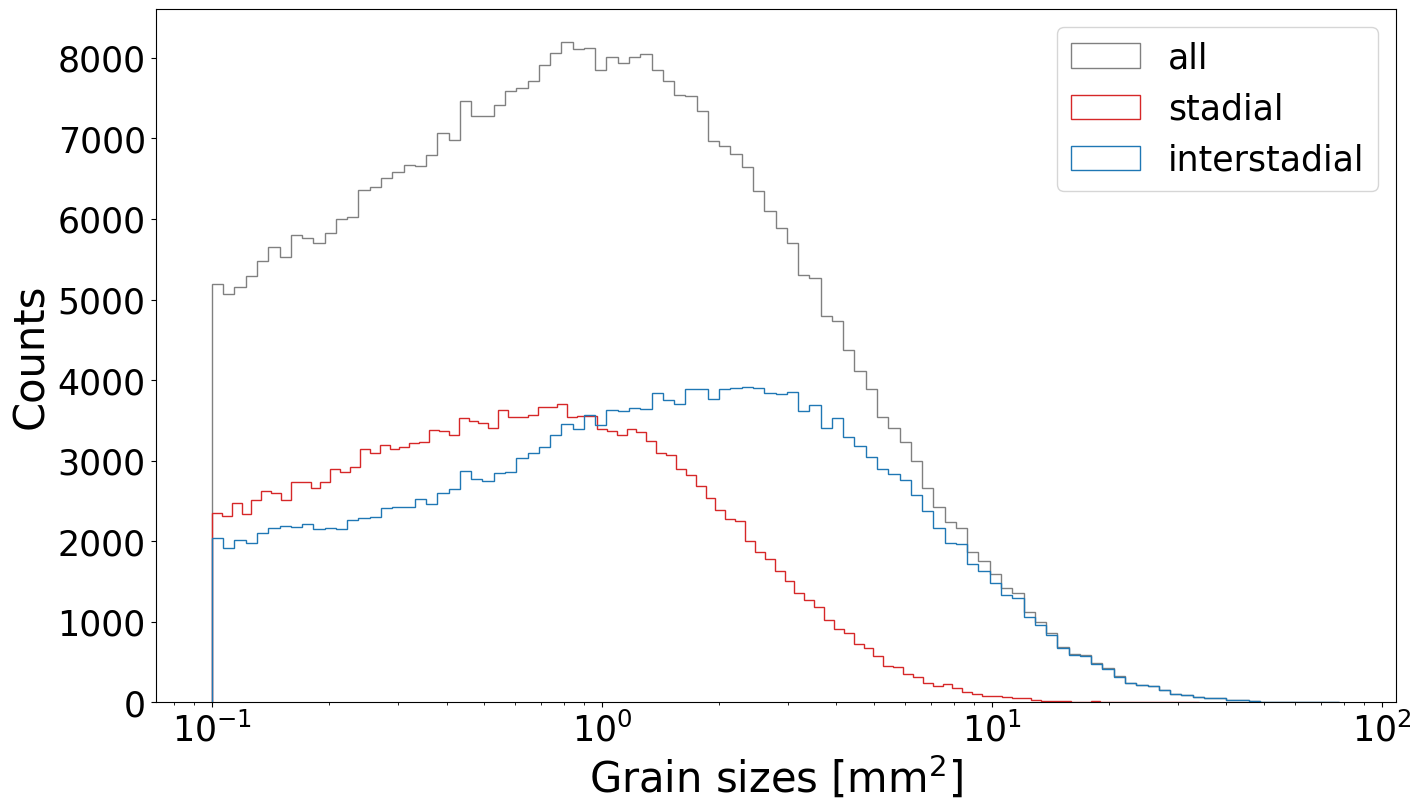

In [5]:
Nbins = 100
cut_off = 100000
xmin = cut_off/1e6
xmax = 20

bags_stadial = list(df.keys())[23:38]
bags_interstadial = np.concatenate((np.array(list(df.keys())[:23]),np.array(list(df.keys())[40:])),axis=0)

sizes_mm_stadial = np.array([])
sizes_mm_interstadial = np.array([])
sizes_mm = np.array([])

for bag in df.keys():
    df[bag] = df[bag][df[bag].area > cut_off]
    new_array = np.array(df[bag]["area"]/1000000)
    sizes_mm = np.concatenate((sizes_mm, new_array))

for bag in bags_stadial:
    df[bag] = df[bag][df[bag].area > cut_off]
    new_array = np.array(df[bag]["area"]/1000000)
    sizes_mm_stadial = np.concatenate((sizes_mm_stadial, new_array))
    
for bag in bags_interstadial:
    df[bag] = df[bag][df[bag].area > cut_off]
    new_array = np.array(df[bag]["area"]/1000000)
    sizes_mm_interstadial = np.concatenate((sizes_mm_interstadial, new_array))
    
counts, bin_edges = np.histogram(sizes_mm_stadial, bins=Nbins)
logbins = np.logspace(np.log10(bin_edges[0]),np.log10(bin_edges[-1]),len(bin_edges))

counts1, bin_edges1 = np.histogram(sizes_mm_interstadial, bins=Nbins)
logbins1 = np.logspace(np.log10(bin_edges1[0]),np.log10(bin_edges1[-1]),len(bin_edges1))

counts2, bin_edges2 = np.histogram(sizes_mm, bins=Nbins)
logbins2 = np.logspace(np.log10(bin_edges2[0]),np.log10(bin_edges2[-1]),len(bin_edges2))


fig, ax = plt.subplots(figsize=(16, 9))
ax.hist(sizes_mm, bins=logbins2,label="all",range=(xmin, xmax),histtype="step",color="gray",lw=1)
ax.hist(sizes_mm_stadial, bins=logbins,label="stadial",range=(xmin, xmax),histtype="step",color="tab:red",lw=1)
ax.hist(sizes_mm_interstadial, bins=logbins1,label="interstadial",range=(xmin, xmax),histtype="step",color="tab:blue",lw=1)
ax.set_xlabel(xlabel='Grain sizes [mm$^2$]')
ax.set_ylabel(ylabel='Counts')
ax.ticklabel_format(axis="x",style="plain")
#ax.set(title="Grain size distribution")
ax.set_xscale('log')
ax.legend()
fig.savefig("Plots/27_grain_size_distribution.png",dpi=100);

In [10]:
print("stadial mean =  ",round(np.mean(sizes_mm_stadial),2)," + ",round(np.std(sizes_mm_stadial),2))
print("interstadial mean =  ",round(np.mean(sizes_mm_interstadial),2)," + ",round(np.std(sizes_mm_interstadial),2))
print("all mean =  ",round(np.mean(sizes_mm_interstadial),2)," + ",round(np.std(sizes_mm_interstadial),2))

stadial mean =   1.06  +  1.33
interstadial mean =   2.79  +  3.97
